<a href="https://colab.research.google.com/github/merdogan97/DL_Deep-Learning/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_27_06_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# **Deep Learning Assignment-2 (CNN) Image Classification with CNN**

# **Task and Dataset Info**

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# **Import Libraries**

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# **Recognizing and Understanding Data**

**TASK 1: Run the code below to download the dataset using Keras.**

In [160]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [161]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [162]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [163]:
x_train[0].shape

(28, 28)

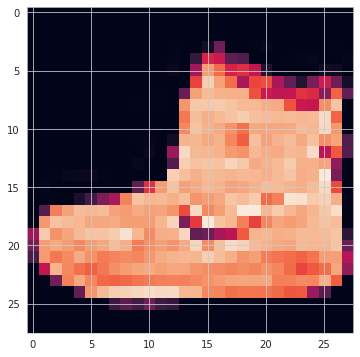

In [164]:
plt.imshow(x_train[0])

In [165]:
y_train[0]

9

In [105]:
classes[9]

'Ankle boot'

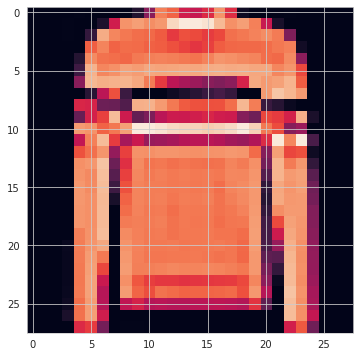

In [166]:
plt.imshow(x_train[5])

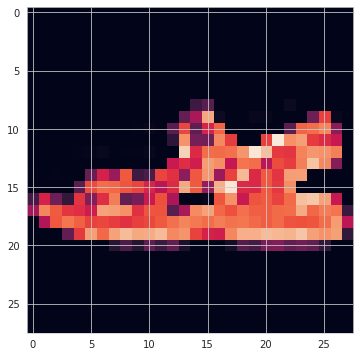

In [167]:
plt.imshow(x_train[1111])

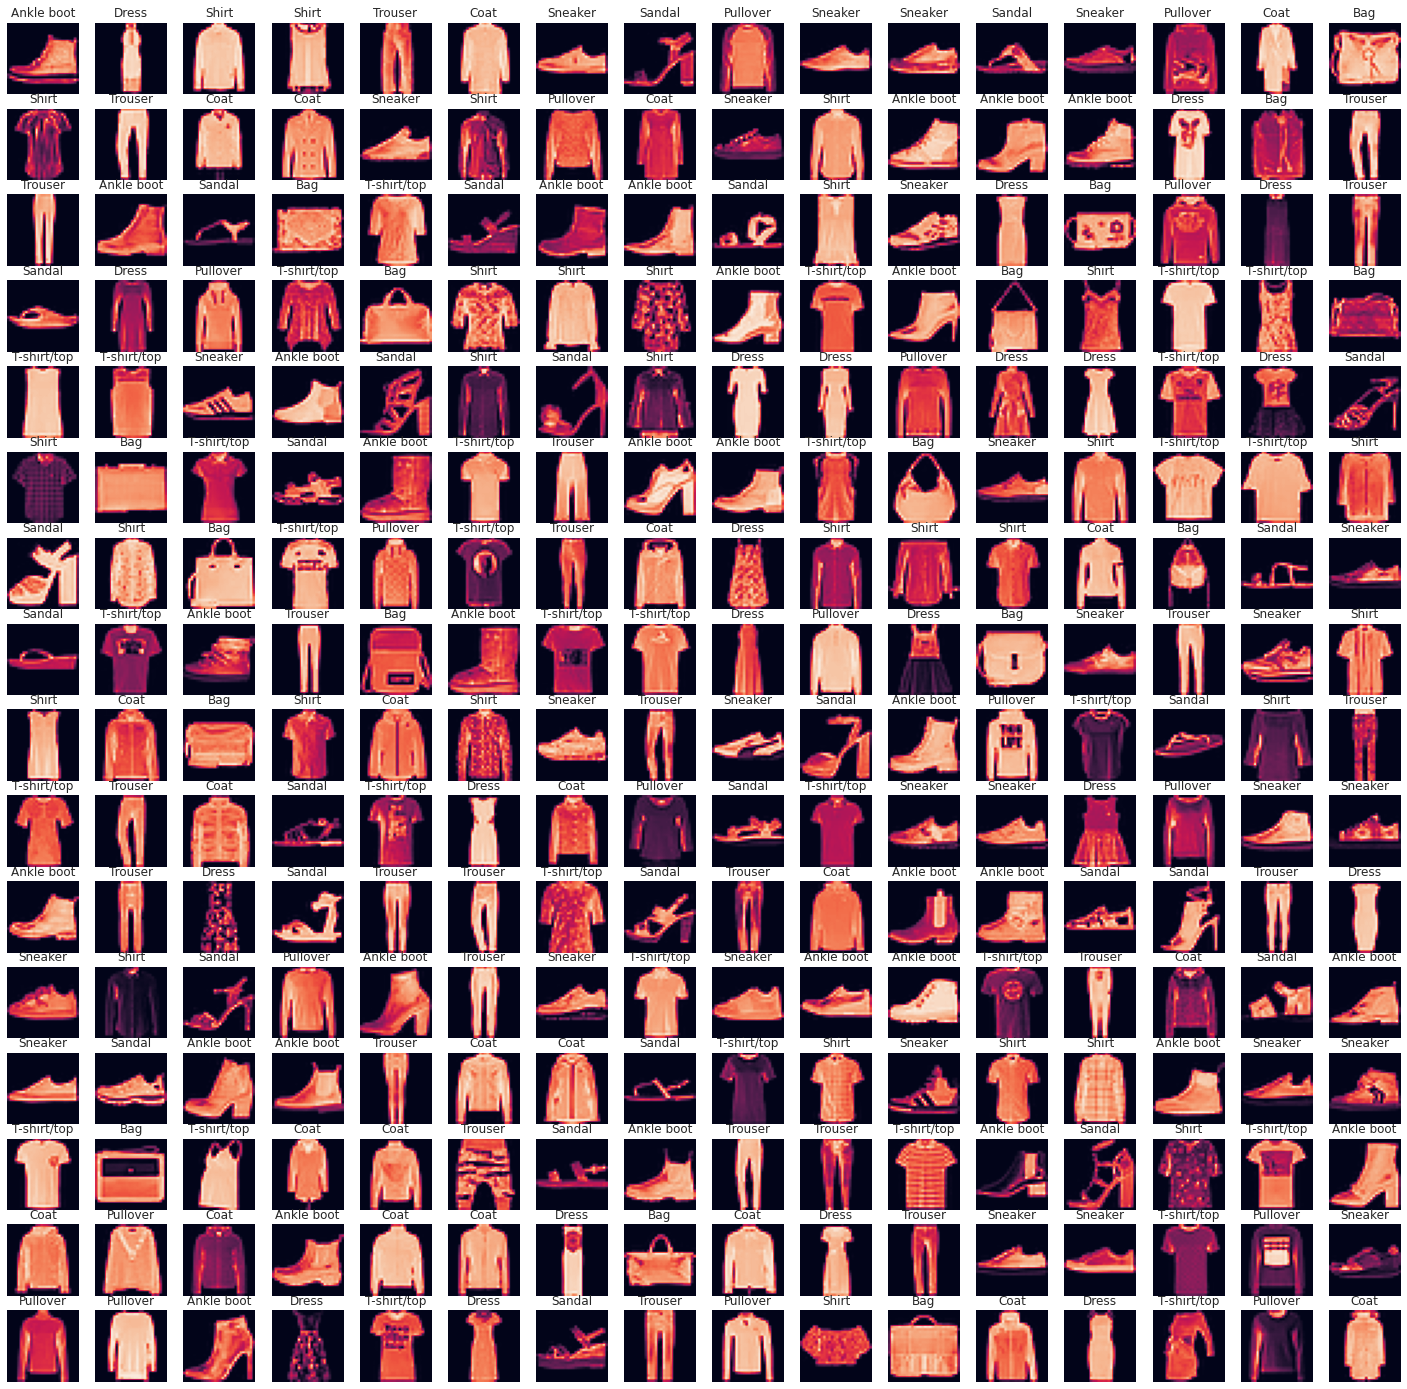

In [168]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

int(np.random.randint(low=0, high=60000, size=1))
x_train[int(np.random.randint(low=0, high=60000, size=1))]

plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])  


# **Data Preprocessing**

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [169]:
x_train.min()

0

In [106]:
x_train.max()

255

In [107]:
x_train = x_train/255

In [108]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [109]:
x_train.shape

(60000, 28, 28)

In [110]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [111]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [112]:
from tensorflow.keras.utils import to_categorical

In [113]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [114]:
y_cat_train = to_categorical(y_train)

In [115]:
y_cat_test = to_categorical(y_test)

# **Modeling**

# **Create the model**

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# **Model Training**

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [117]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 17500)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4480256   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                      

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [121]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.4236 - accuracy: 0.8549 - val_loss: 0.3224 - val_accuracy: 0.8850
Epoch 2/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.3036 - accuracy: 0.8954 - val_loss: 0.3159 - val_accuracy: 0.8912
Epoch 3/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2872 - accuracy: 0.9020 - val_loss: 0.3217 - val_accuracy: 0.8909
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2798 - accuracy: 0.9033 - val_loss: 0.3171 - val_accuracy: 0.8955
Epoch 5/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2806 - accuracy: 0.9044 - val_loss: 0.3069 - val_accuracy: 0.8970
Epoch 6/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2795 - accuracy: 0.9053 - val_loss: 0.3991 - val_accuracy: 0.8808
Epoch 7/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2761 - accuracy: 0.9075 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [122]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.424,0.855,0.322,0.885
1,0.304,0.895,0.316,0.891
2,0.287,0.902,0.322,0.891
3,0.280,0.903,0.317,0.896
4,0.281,0.904,0.307,0.897


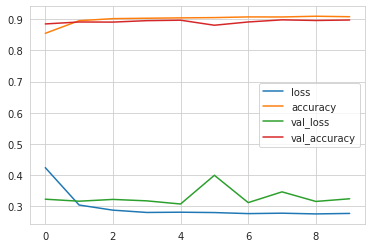

In [123]:
loss_df.plot();

# **Model Evaluation**

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [124]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3237 - accuracy: 0.8976


[0.32373741269111633, 0.897599995136261]

In [125]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3237 - accuracy: 0.8976


[0.32373741269111633, 0.897599995136261]

In [171]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [172]:
predictions = model.predict(x_test)
predictions

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [173]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 0, ..., 8, 3, 8])

In [138]:
y_cat_test.shape

(10000, 10)

In [139]:
y_cat_test.shape

(10000, 10)

In [140]:
np.argmax(predictions[0])

9

In [131]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [141]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.79      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.77      0.88      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.76      0.67      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [142]:
classes[6]

'Shirt'

## Prediction

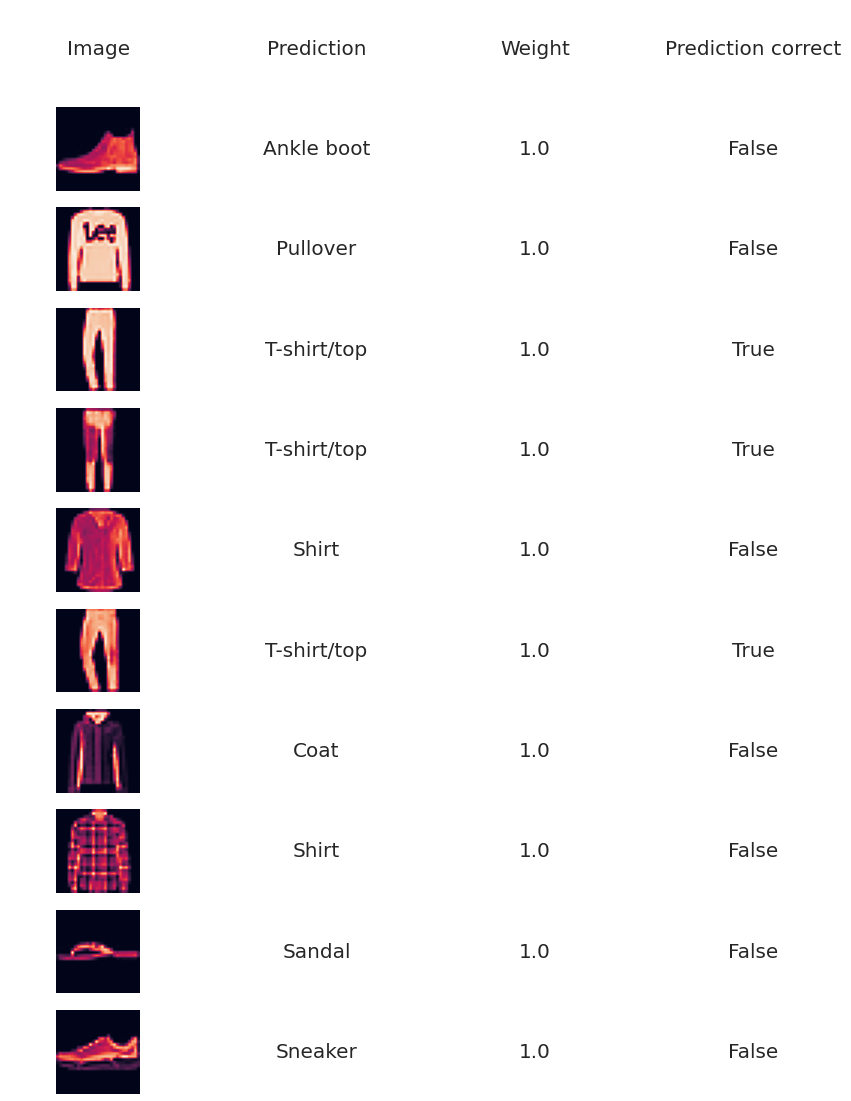

In [175]:
predictions = model.predict(x_test)

text_size = 20

plt.figure(figsize=(15,20))
plt.subplot(11, 4, 1)
plt.axis('off')
plt.text(0.5, 0.5, "Image", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 2)
plt.axis('off')
plt.text(0.5, 0.5, "Prediction", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 3)
plt.axis('off')
plt.text(0.5, 0.5, "Weight", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 4)
plt.axis('off')
plt.text(0.5, 0.5, "Prediction correct", size=text_size, ha='center', va='center')

for i in range(10):
    predicted = predictions[i].argmax()
    actual = y_test[i].argmax()
    
    plt.subplot(11, 4, i*4 + 5)
    plt.axis('off')
    plt.imshow(x_test[i], cmap=None)
    
    plt.subplot(11, 4, i*4 + 6)
    plt.axis('off')
    plt.text(0.5, 0.5, classes[predicted], size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 7)
    plt.axis('off')
    plt.text(0.5, 0.5, str(predictions[i][predicted]), size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 8)
    plt.axis('off')
    plt.text(0.5, 0.5, str(actual == predicted), size=text_size, ha='center', va='center')
# show the figure
plt.show()

In [176]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

In [177]:
samples[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 192, 115,  27,
          1,   1,  31, 143, 179,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5, 113, 185, 216, 190, 229, 237,
        220, 217, 242, 201, 191, 222, 167,  87,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  50, 175, 194, 189, 186, 185, 187, 199,
        188, 184, 193, 185, 188, 183, 187, 193, 210,  15,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 199, 194, 181, 188, 190, 189, 188, 192,
        199, 197, 195, 192, 191, 188, 184, 177, 189, 178,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  48, 194, 189, 189, 193, 189, 189, 188, 188,
        191, 191, 190, 193, 190, 188, 186, 194, 184, 189,  42,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 194, 228, 196, 190, 189, 191, 177, 177, 181,
        187, 186, 184, 180, 181, 188, 192, 188, 187, 191, 126,   0,   0,
          0,   0],
       [  

In [178]:
img=samples[0]
img.shape

(28, 28)

In [179]:
type(img)

numpy.ndarray

In [148]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [180]:
model.predict(resized_img)

array([[2.1194521e-06, 1.6321847e-10, 8.5555790e-03, 3.2867032e-08,
        9.8340893e-01, 4.2326666e-11, 8.0327429e-03, 7.9624729e-13,
        5.7163004e-07, 1.4019232e-09]], dtype=float32)

In [181]:
np.argmax(model.predict(resized_img))

4

In [182]:
classes[0]

'T-shirt/top'

In [183]:
for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")
    

T-shirt/top   1.000
Trouser       0.000
Pullover      0.000
Dress         0.000
Coat          0.000
Sandal        0.000
Shirt         0.000
Sneaker       0.000
Bag           0.000
Ankle boot    0.000
dtype: float32
predicted class is : T-shirt/top

T-shirt/top   1.000
Trouser       0.000
Pullover      0.000
Dress         0.000
Coat          0.000
Sandal        0.000
Shirt         0.000
Sneaker       0.000
Bag           0.000
Ankle boot    0.000
dtype: float32
predicted class is : T-shirt/top

T-shirt/top   0.000
Trouser       0.000
Pullover      0.000
Dress         0.000
Coat          0.000
Sandal        0.000
Shirt         0.000
Sneaker       0.000
Bag           1.000
Ankle boot    0.000
dtype: float32
predicted class is : Bag

T-shirt/top   0.000
Trouser       0.000
Pullover      0.000
Dress         0.000
Coat          1.000
Sandal        0.000
Shirt         0.000
Sneaker       0.000
Bag           0.000
Ankle boot    0.000
dtype: float32
predicted class is : Coat



# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___